# Ejercicio de Clasificación de Hojas
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [6]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


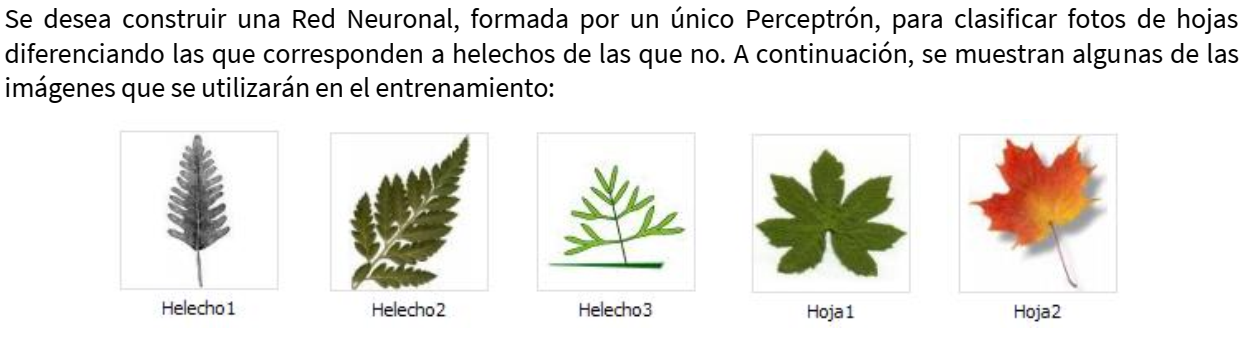
---
**Apertura de archivos con detección de codificación de los caracteres**

In [13]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'hojas.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# nuevo dataframe "datos" sin la columna "clase"
datos = df.drop('Clase',axis=1)

# extrae las clases del dataframe de forma que 'Helecho'=> 1 y 'Hoja' => 0
etiquetas = (df['Clase']=='Helecho')*1

# Visualiza
display(df)

,Perimetro,Area,Clase
0,667.997041,3793,Hoja
1,784.246825,2574,Helecho
2,367.747258,3582,Hoja
3,901.595021,5068,Helecho
4,949.175757,12216,Hoja
5,763.269119,980,Helecho
6,197.580736,3370,Hoja
7,799.619408,1669,Helecho
8,452.475180,3585,Hoja
9,1564.482323,2964,Helecho


---
### Entrenamiento de Perceptrón
Utilice los ejemplos del archivo hojas.csv para entrenar un perceptrón que permita reconocer cuando se trata de una hoja de helecho. Utilice una velocidad de aprendizaje (parámetro alfa) de 0.01 y una máxima
cantidad de iteraciones MAX_ITE=300.

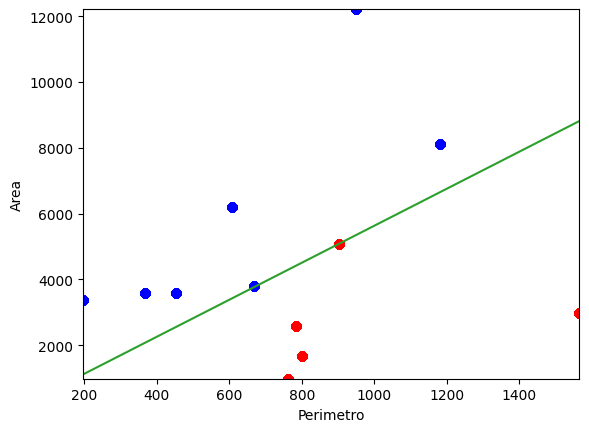

Accuracy        : 100.00
Iteraciones     : 223
pesos del modelo: [ 70.9552793  -12.60019755]
bias del modelo :  0.4894750467700759


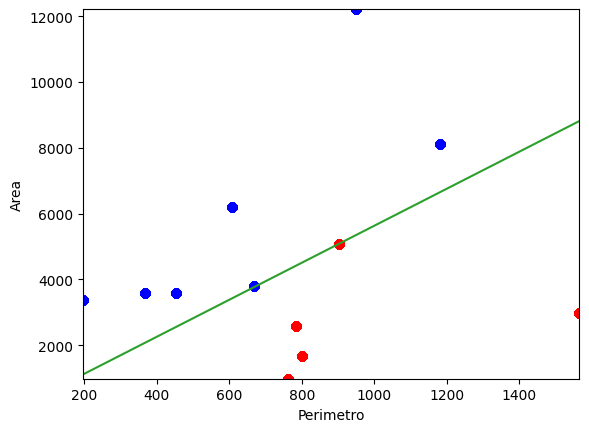

In [17]:
# importa perceptron de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassPerceptron import Perceptron
import numpy as np

alfa = 0.001     # velocidad de aprendizaje
max_itera = 300 # maxima iteración
dibujar = True

# crea perceptrón con parámetros indicados
modelo = Perceptron(alpha=alfa, n_iter=max_itera, draw=dibujar, title=datos.columns)

modelo.fit(datos.values, etiquetas)   # entrena

# Prediccion
y = modelo.predict(datos)

# Resultados - Accuracy
# = (y==etiquetas).sum()*100 / etiquetas.shape[0]
acc = (y==etiquetas).sum()*100 / len(etiquetas)
# otra forma de calcular lo acc
# acc = np.sum(y==etiquetas)*100 / len(etiquetas)
iter = len(modelo.errors_)

print('Accuracy        : %6.2f' % acc)
print('Iteraciones     : %d' % iter)

print('pesos del modelo:', modelo.w_)
print('bias del modelo : ',modelo.b_)

In [20]:
print("Total etiquetas:", len(etiquetas))
print(etiquetas)


Total etiquetas: 12
0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    0
Name: Clase, dtype: int64


---
### Entrenamiento de Perceptron con Diferentes Configuraciones de Datasets y Tasa de Aprendizaje
Realice 50 ejecuciones independientes del entrenamiento de a) utilizando una máxima cantidad de iteraciones MAX_ITE=100. Luego complete el siguiente cuadro considerando sólo los casos exitosos en los que se logró obtener un perceptrón capaz de clasificar correctamente todos los ejemplos. Registre el porcentaje de ejecuciones con un accuracy del 100% y la cantidad de iteraciones promedio empleadas en estas ejecuciones exitosas.
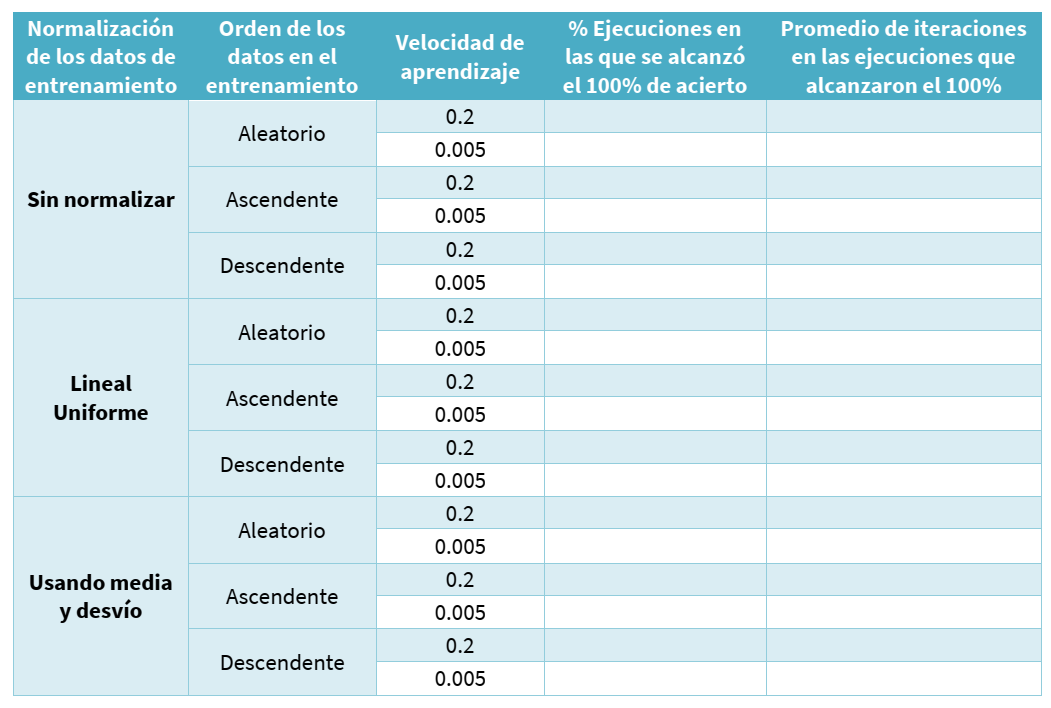

In [21]:
from sklearn import preprocessing

# función para ordenar  y normalizar datos/ejemplos con respectivas clases/objetivos
# X => datos, T => clases, orden = tipo de roden, norm = tipo de normalizacion
# retorna X y T ordenados y normalizados y scaler si corresponde
def OrdenacionNormalizacion(X, T, orden, norm):
    X_new = X.copy()
    T_new = T.copy()
    if orden == "aleatoreo":
         idx = np.array(range(0,len(X)))
         np.random.shuffle(idx)
         pass
    elif orden =="ascendente":
         idx = X_new[:, 0].argsort()
    else:
         idx = X_new[:, 0].argsort()[::-1]


    if norm == "no":
        scaler = None
    elif norm == "lineal":
        scaler = preprocessing.MinMaxScaler()
        X_new = scaler.fit_transform(X_new)
    else:
        scaler = preprocessing.StandardScaler()
        X_new = scaler.fit_transform(X_new)

    return (X_new[idx], T_new[idx], scaler)

# Seleccion de la clase a predecir
CLASE = "Helecho"
#CLASE = "Hoja"

# otra forma de seleccionar los atributos/clases
# selecciona todas las filas (:) y las columnas a partir del 1er atributo (0) selecciona 2 (:2)
X = np.array(df.iloc[:,0:2])          # selecciona atributos Perimetro y Area

# selecciona todas las filas (:) y la 3er columna (2, 0 es la 1era)
T = np.array(df.iloc[:,2]==CLASE)*1   # clase para cada ejemplo X. 1=> cuando coincide con "CLASE", 0=> CC


MAX_ITE = 100
REPETICIONES = 50
ALFA = [0.2, 0.005]
ORDEN = ['aleatoreo', 'ascendente' , 'descendente']
NORMALIZAR = ['no', 'lineal' , 'estadistica']

print('NORMALIZACION |     ORDEN    |  APRENDIZAJE |  EJECUCIONES | PROM ITERACIONES')
for norm in NORMALIZAR:

    for orden in ORDEN:

        for alfa in ALFA:
            aciertos = 0.0
            iteraciones = 0.0

            for veces in range(0,REPETICIONES):
                (X_new, T_new, scaler) = OrdenacionNormalizacion(X, T, orden, norm)
                # crea perceptrón con parámetros indicados
                modelo = Perceptron(alpha=alfa, n_iter=MAX_ITE, draw=False)
                modelo.fit(X_new, T_new)   # entrena

                # iteración de finalización
                iteracion = len(modelo.errors_)

                if iteracion < MAX_ITE:
                    iteraciones+= iteracion
                    aciertos = aciertos + 1

            tasa_aciertos = 100.0*aciertos/REPETICIONES
            if aciertos == 0:
                prom_iteraciones = 0
            else:
                prom_iteraciones = iteraciones/aciertos

            print("%13s | %12s | %12.3f | %12d | %12.2f" % (norm, orden, alfa, tasa_aciertos, prom_iteraciones))
            #print("%s | %s | %f | %f | %f" % (norm, orden, alfa, tasa_aciertos, prom_iteraciones))

NORMALIZACION |     ORDEN    |  APRENDIZAJE |  EJECUCIONES | PROM ITERACIONES
           no |    aleatoreo |        0.200 |           50 |        41.40
           no |    aleatoreo |        0.005 |           40 |        49.70
           no |   ascendente |        0.200 |            0 |         0.00
           no |   ascendente |        0.005 |            0 |         0.00
           no |  descendente |        0.200 |            0 |         0.00
           no |  descendente |        0.005 |           40 |        31.45
       lineal |    aleatoreo |        0.200 |           78 |        20.67
       lineal |    aleatoreo |        0.005 |           62 |        51.29
       lineal |   ascendente |        0.200 |           20 |        32.70
       lineal |   ascendente |        0.005 |           38 |        55.21
       lineal |  descendente |        0.200 |           98 |        43.61
       lineal |  descendente |        0.005 |           54 |        57.30
  estadistica |    aleatoreo |    

In [11]:
a = np.array([3,1,9,8])
print(a)
print(a.argsort())      # 1,3,8,9 => argsort => 1,0,3,2
print(a[a.argsort()])

for i in a.argsort():
    print(a[i], end=' ')

[3 1 9 8]
[1 0 3 2]
[1 3 8 9]
1 3 8 9 